# Clustering

## Run following clustering algorithms for given fonts
1. K-Means
1. Spectral Clustering
1. Agglomerative
1. Mapper - from homework problem - if time permits

## Imports and Globals

In [22]:
from collections import namedtuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU

## Selected Font/Font Variant

In [2]:

FontSelection = namedtuple('FontSelection', ['name', 'variant', 'style'])
fonts = [
    FontSelection('garamond', 'GARAMOND', 'Old Style'),
    FontSelection('baskerville', 'BASKERVILLE OLD FACE', 'Transitional'),
    FontSelection('bodoni', 'BODONI', 'Modern'),
    FontSelection('arial', 'ARIAL', 'Sans Serif')
]

### Load Font Data Collect For Dim Reduction

In [3]:
uln = ULN.UpperLowerNumerals.get_ascii_codes()

lf = LF.LoadFont('garamond')
font_dict = lf.get_trimmed_font()
font_df = font_dict['GARAMOND']['df']

norm_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[0] for x in uln])
bold_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[1] for x in uln])

label_ar = [chr(x) for x in norm_df.m_label]

df=norm_df.drop(columns=['m_label'])
df=df-df.mean(axis=0)

pca = PCA(n_components=20)
pca.fit(df)

x=df.dot(pca.components_[0])
y=df.dot(pca.components_[1])

reduced_df = pd.DataFrame([x.transpose(), y.transpose()]).transpose()
reduced_df.columns=['x', 'y']

### K-Means

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(reduced_df)
print(f'Labels  : {kmeans.labels_}')
for i in range(4):
    print(f'Occurences of {i} in labels {np.count_nonzero(kmeans.labels_ == i)}')
print(f'Centers : {kmeans.cluster_centers_}')

Labels  : [1 2 0 0 0 2 0 2 3 0 2 3 0 2 0 2 0 1 0 1 2 1 1 1 1 1 1 2 0 2 2 2 0 2 3 1 2
 2 1 1 0 2 0 1 0 3 2 1 1 1 1 1 0 3 0 0 1 0 0 1 0 0]
Occurences of 0 in labels 21
Occurences of 1 in labels 20
Occurences of 2 in labels 16
Occurences of 3 in labels 5
Centers : [[-607.20700521 -515.82827843]
 [ 532.37405536   95.424567  ]
 [-336.02689189  766.05899397]
 [1496.05925445 -666.6082793 ]]


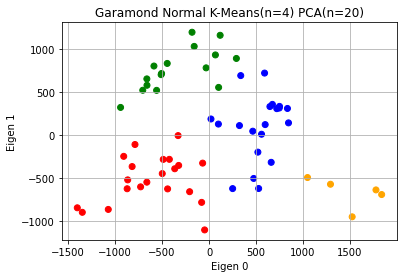

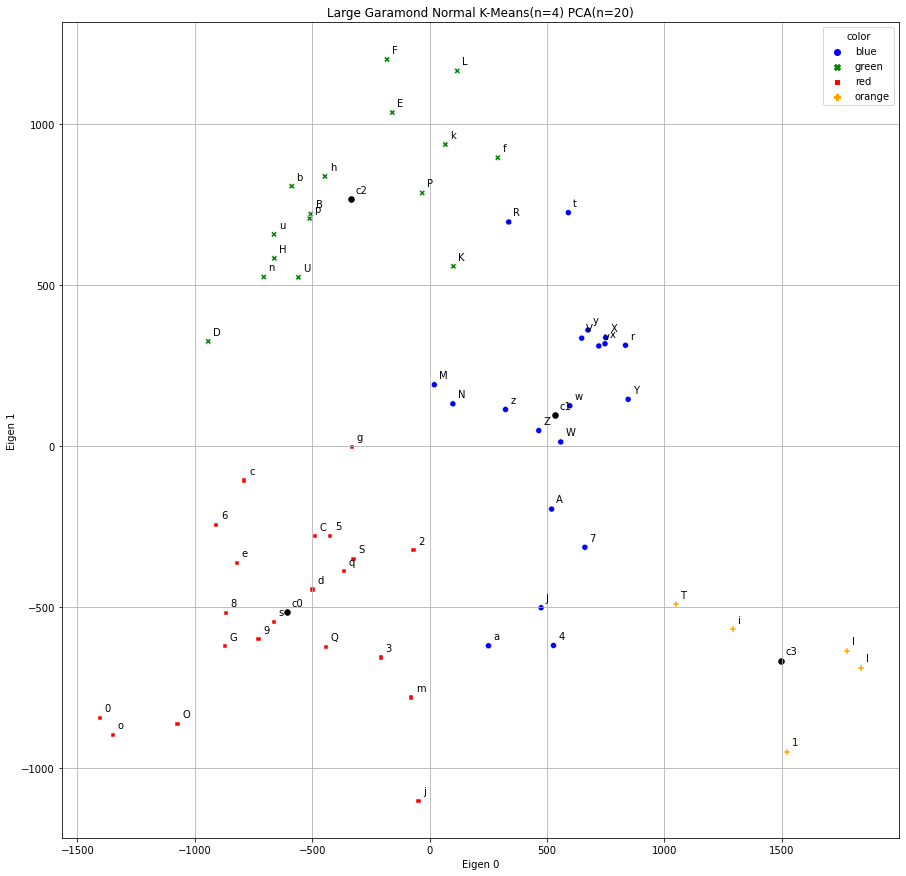

In [16]:
PlotCfg = namedtuple('PlotCfg', ['cluster','color', 'name'])
plot_cfg = [
    PlotCfg(0,'red','Class 0'),
    PlotCfg(1, 'blue', 'Class 1'),
    PlotCfg(2, 'green', 'Class 2'),
    PlotCfg(3, 'orange', 'Class 3')
]

plot_df = pd.DataFrame(
    [
        np.array(kmeans.labels_).transpose(), 
        np.array(label_ar).transpose(),
        x.transpose(), 
        y.transpose()
    ]
).transpose()

plot_df.columns=['c_label', 'm_label', 'x', 'y']

plot_df['color'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].color)
plot_df['class'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].name)

plot_title = 'Garamond Normal K-Means(n=4) PCA(n=20)'
plt.title(plot_title)
plt.xlabel("Eigen 0")
plt.ylabel("Eigen 1")
plt.grid()

plt.scatter(plot_df.x,plot_df.y, c=plot_df.color)

 # Larger Labeled Plot
plt.figure(figsize=(15,15))
sns.scatterplot(
    data=plot_df,
    x='x',
    y='y',
    hue='color',
    style='color',
    palette=['blue', 'green', 'red', 'orange']
)

for i in range(plot_df.shape[0]):
    plt.text(
        x=plot_df.x[i]+20,
        y=plot_df.y[i]+20,
        s=plot_df.m_label[i]
    )

# Show centroids of each cluster
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s=30, color='black')
for i in range(len(centroids)):
    plt.text(
        x=centroids[i,0]+20,
        y=centroids[i,1]+20,
        s=f'c{i}'
    )

plot_title='Large '+plot_title
plt.title(plot_title)
plt.xlabel('Eigen 0')
plt.ylabel('Eigen 1')
plt.grid()
plt.show()

### Spectral Clustering

In [35]:
spectral = SpectralClustering(4, eigen_solver='arpack',affinity="nearest_neighbors")
spectral.fit(df)
spectral.labels_
for i in range(4):
    print(f'Occurences of {i} in labels {np.count_nonzero(spectral.labels_ == i)}')

Occurences of 0 in labels 12
Occurences of 1 in labels 11
Occurences of 2 in labels 22
Occurences of 3 in labels 17


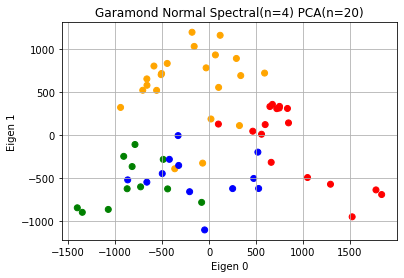

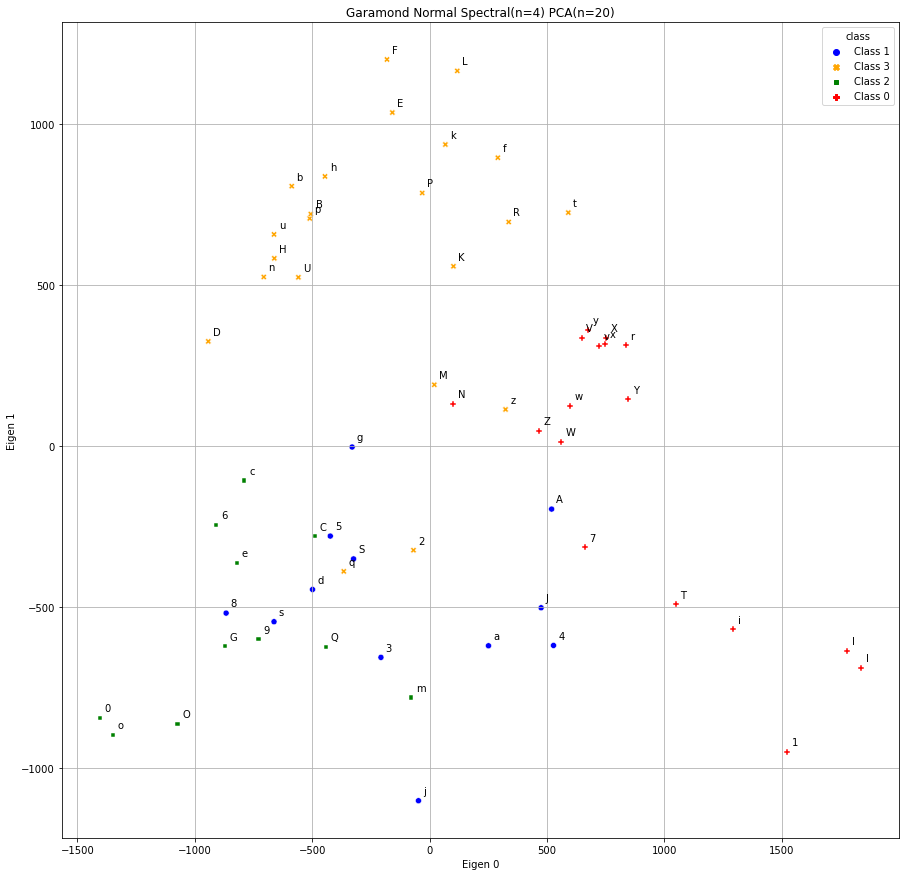

In [21]:
plot_df = pd.DataFrame(
    [
        np.array(spectral.labels_).transpose(), 
        np.array(label_ar).transpose(),
        x.transpose(), 
        y.transpose()
    ]
).transpose()

plot_df.columns=['c_label', 'm_label', 'x', 'y']

plot_df['color'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].color)
plot_df['class'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].name)

plot_title = 'Garamond Normal Spectral(n=4) PCA(n=20)'
plt.title(plot_title)
plt.xlabel("Eigen 0")
plt.ylabel("Eigen 1")
plt.grid()

plt.scatter(plot_df.x,plot_df.y, c=plot_df.color)

 # Larger Labeled Plot
plt.figure(figsize=(15,15))
sns.scatterplot(
    data=plot_df,
    x='x',
    y='y',
    hue='class',
    style='class',
#    palette=['green', 'blue', 'red', 'orange']
    palette=['blue', 'orange', 'green', 'red']
)

for i in range(plot_df.shape[0]):
    plt.text(
        x=plot_df.x[i]+20,
        y=plot_df.y[i]+20,
        s=plot_df.m_label[i]
    )

plt.title(plot_title)
plt.xlabel('Eigen 0')
plt.ylabel('Eigen 1')
plt.grid()
plt.show()

### Affinity Propagation

In [58]:
connectivity = kneighbors_graph(df, n_neighbors=2, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
aggcluster = AgglomerativeClustering(
    linkage="ward", 
    affinity="euclidean",
    n_clusters=4, 
    connectivity=connectivity
)

aggcluster.fit(df)
print(f'Labels {aggcluster.labels_}')
for i in range(4):
    print(f'Occurences of {i} in labels {np.count_nonzero(aggcluster.labels_ == i)}')

Labels [3 1 2 1 2 1 3 1 0 3 1 0 0 1 2 1 1 1 3 1 1 0 1 0 0 3 3 1 2 1 1 1 2 1 0 3 1
 1 0 0 2 1 2 1 3 0 1 0 1 0 0 3 2 0 3 3 3 3 2 0 3 2]
Occurences of 0 in labels 15
Occurences of 1 in labels 23
Occurences of 2 in labels 10
Occurences of 3 in labels 14


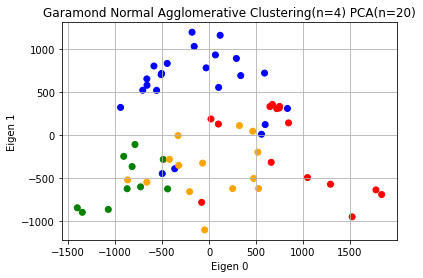

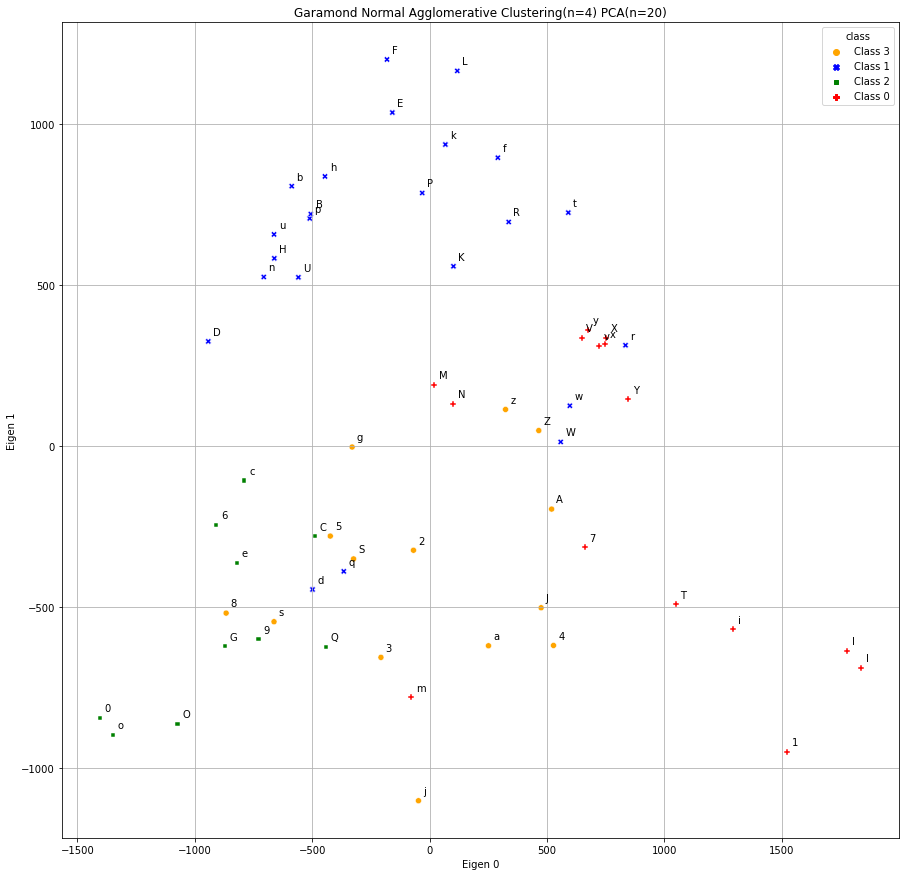

In [64]:
plot_df = pd.DataFrame(
    [
        np.array(aggcluster.labels_).transpose(), 
        np.array(label_ar).transpose(),
        x.transpose(), 
        y.transpose()
    ]
).transpose()

plot_df.columns=['c_label', 'm_label', 'x', 'y']

plot_df['color'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].color)
plot_df['class'] = plot_df['c_label'].apply(lambda x: plot_cfg[int(x)].name)

plot_title = 'Garamond Normal Agglomerative Clustering(n=4) PCA(n=20)'
plt.title(plot_title)
plt.xlabel("Eigen 0")
plt.ylabel("Eigen 1")
plt.grid()

plt.scatter(plot_df.x,plot_df.y, c=plot_df.color)

 # Larger Labeled Plot
plt.figure(figsize=(15,15))
sns.scatterplot(
    data=plot_df,
    x='x',
    y='y',
    hue='class',
    style='class',
    palette=['orange', 'blue', 'green', 'red']
)

for i in range(plot_df.shape[0]):
    plt.text(
        x=plot_df.x[i]+20,
        y=plot_df.y[i]+20,
        s=plot_df.m_label[i]
    )

plt.title(plot_title)
plt.xlabel('Eigen 0')
plt.ylabel('Eigen 1')
plt.grid()
plt.show()